# Лабораторная работа №2: Кластеризация методом K-means

### Цель работы
Цель данной лабораторной работы — ознакомиться с методом кластеризации K-means на примере набора данных о глобальном индексе искусственного интеллекта. 

#### В ходе выполнения работы мы:
- Добавим новый атрибут к набору данных.
- Проведем очистку данных от выбросов и дубликатов.
- Построим графики рассеивания для визуализации группировок данных.
- Применим метод K-means для кластеризации данных и сделаем выводы по результатам.

### 1. Загрузка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('AI_index_db.csv')  
data.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


### 2. Добавление нового атрибута
Добавим новый атрибут. Создадим столбец AI Influence, который является линейной комбинацией нескольких показателей Research, Talent и Development.

In [17]:
data['AI Influence'] = data[['Research', 'Talent', 'Development']].mean(axis=1)

data.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,AI Influence
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy,100.000000
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy,55.966667
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy,33.726667
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy,29.243333
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy,32.116667


### 3. Преобработка данных
* В данных нет пропущенных значений, так как в ходе предварительного анализа из Первой Работы было установлено, что все значения присутствуют.
* Для выявления и удаления выбросов используем межквартильный размах (IQR).

In [22]:
# Удаление дубликатов
data.drop_duplicates(inplace=True)

# IQR
numeric_cols = data.select_dtypes(include=['float64']).columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Удаление выбросов
data_clean = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f'Размер данных после очистки: {data_clean.shape}')

Размер данных после очистки: (50, 14)


### 4. Стандартизация данных
Для алгоритма K-means важна шкала значений, поэтому перед кластеризацией масштабируем данные.

In [23]:
# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[['Research', 'Talent', 'Development', 'AI Influence']])

# Преобразуем данные обратно в DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Research', 'Talent', 'Development', 'AI Influence'])

### 5. Применение K-means
Теперь применим метод K-means для кластеризации данных.

In [32]:
# Определим количество кластеров, например, 3
kmeans = KMeans(n_clusters=3, random_state=42)
data_clean.loc[:, 'Cluster'] = kmeans.fit_predict(scaled_df)

data_clean.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime,AI Influence
7,The Netherlands,33.83,81.99,88.05,25.54,30.17,62.35,4.97,36.35,Europe,2,High,Liberal democracy,29.846667
8,Germany,27.63,77.22,70.22,35.84,24.79,84.65,8.29,36.04,Europe,2,High,Liberal democracy,29.420000
9,France,28.32,77.15,80.02,25.48,21.44,91.20,7.65,34.42,Europe,2,High,Liberal democracy,25.080000
10,Australia,25.43,63.43,61.23,32.63,41.15,82.11,6.72,33.86,Asia-Pacific,2,High,Liberal democracy,33.070000
11,Ireland,29.93,89.50,70.15,16.79,30.85,69.44,3.94,33.04,Europe,2,High,Liberal democracy,25.856667


### 6. Визуализация кластеров
Построим несколько графиков рассеивания, чтобы визуально оценить, как данные разделены на кластеры.

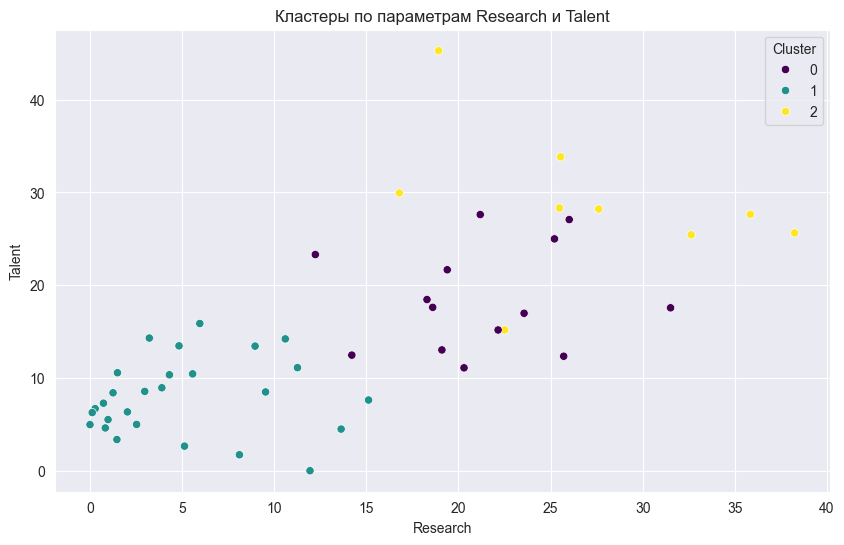

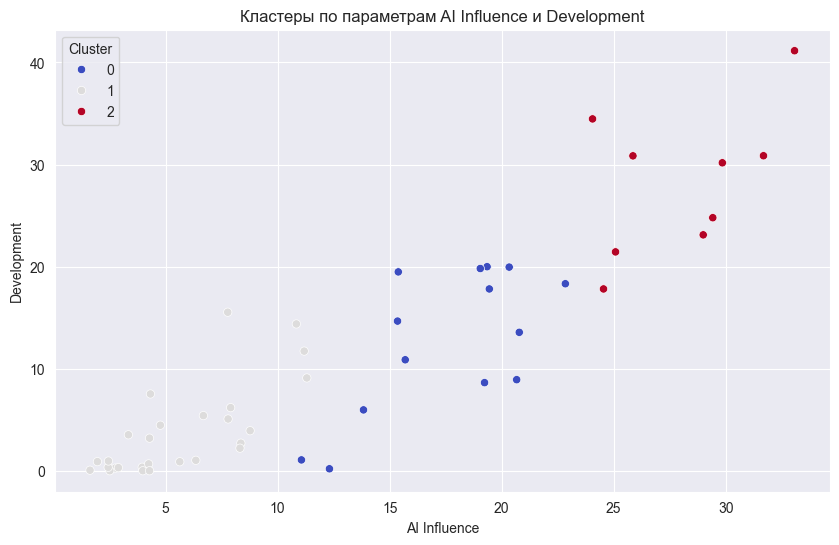

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data_clean, x='Research', y='Talent', hue='Cluster', palette='viridis')
plt.title('Кластеры по параметрам Research и Talent')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=data_clean, x='AI Influence', y='Development', hue='Cluster', palette='coolwarm')
plt.title('Кластеры по параметрам AI Influence и Development')
plt.show()

### 7. Оценка качества кластеризации
Используем показатель инерции (inertia) и метод локтя (Elbow Method) для оценки оптимального количества кластеров.

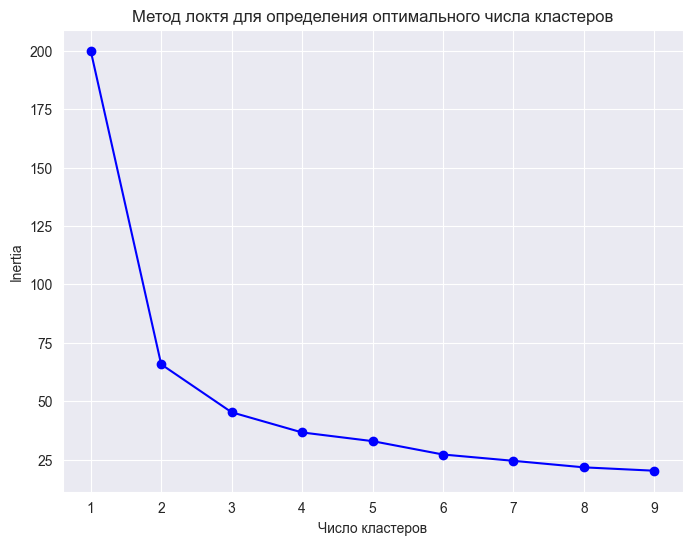

In [34]:
# Метод локтя для выбора оптимального числа кластеров
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Число кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.show()